# Kaggle Competition - Quant & Machine Learning Course
# Tutorial 9: Stacking Models


- resource: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
- stacking Regressor documentation https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

In [29]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
 
# get the dataset
# a simulated dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [33]:
# define dataset
X, y = get_dataset()
print(X.shape)
print(X[:2])
print(y[:2])

(1000, 20)
[[ 0.59332206 -0.56637507  1.34808718 -0.57054047 -0.72480487  1.05648449
   0.77744852  0.07361796  0.88398267  2.02843157  1.01902732  0.11227799
   0.94218853  0.26741783  0.91458143 -0.72759572  1.08842814 -0.61450942
  -0.69387293  1.69169009]
 [ 0.02335703  1.31289541 -0.10889847  1.29099337  0.88608992  1.04003845
  -1.56111989  0.26486763  0.3093178   0.07983961 -0.8311734  -0.39712568
   0.31897183  0.52795055 -0.56398646  0.93755484  2.91730876  0.57326545
   1.15321262  1.0986885 ]]
[419.49285417 524.80418832]


>knn -101.019 (7.161)
>cart -147.693 (10.480)
>svm -162.419 (12.565)
>stacking -56.652 (5.325)


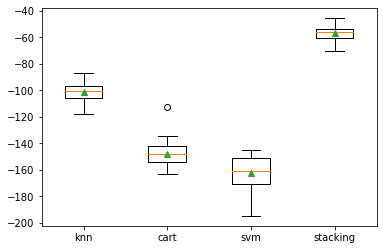

In [23]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
models['stacking'].fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [44]:
models['stacking'].final_estimator_.coef_

array([1.01423846, 0.17970482, 6.08191338])

In [45]:
models['stacking'].final_estimator_.intercept_

-5.0905420215851

In [70]:
models['knn'].fit(X_train,y_train)
y_pred_knn = models['knn'].predict(X_test)
models['knn'].score(X_test,y_test)

0.6073975995197729

In [71]:
models['cart'].fit(X_train,y_train)
y_pred_cart = models['knn'].predict(X_test)
models['cart'].score(X_test,y_test)

0.2629361204445687

In [72]:
models['svm'].fit(X_train,y_train)
y_pred_svm = models['svm'].predict(X_test)
models['svm'].score(X_test,y_test)

0.07672925759301452

In [73]:
y_pred = models['stacking'].predict(X_test)
models['stacking'].score(X_test,y_test)

0.8104474303707823